In [ ]:
!pip install kaggle
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!kaggle datasets download -d prishasawhney/email-classification-ham-spam
!unzip email-classification-ham-spam.zip


Dataset URL: https://www.kaggle.com/datasets/prishasawhney/email-classification-ham-spam
License(s): other
  0% 0.00/4.19k [00:00<?, ?B/s]
100% 4.19k/4.19k [00:00<00:00, 3.99MB/s]
Archive:  email-classification-ham-spam.zip
  inflating: email_classification.csv  


In [ ]:
!pip install pandas numpy tensorflow scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

## Descrição dos dados
O dataset utilizado contém informações de emails categorizados em duas classes:

Email: Texto do email.
Label: Categoria binária indicando se o email é de spam (1) ou não spam (0).

Esses dados são bastante utilizados em tarefas de classificação de spam, onde o foco é desenvolver modelos que possam identificar automaticamente emails que são spam com base em seu conteúdo textual.

In [ ]:
df = pd.read_csv('/content/email_classification.csv')

# Codificar os rótulos
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=42)

In [ ]:
df

,email,label
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0
...,...,...
174,We're pleased to inform you that your refund h...,0
175,Get rich quick! Invest in our revolutionary ne...,1
176,Your free trial period is ending soon. Upgrade...,0
177,Your order is on its way! Track your shipment ...,0


In [ ]:
# Tokenizando
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)


In [ ]:
# Criando o modelo RNN
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_sequence_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando
model.fit(X_train_padded, y_train, epochs=5, batch_size=2, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6863 - loss: 0.5838 - val_accuracy: 0.8667 - val_loss: 0.4382
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9995 - loss: 0.1548 - val_accuracy: 0.8000 - val_loss: 0.4860
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 0.8667 - val_loss: 0.2412
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8667 - val_loss: 0.2345
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8667 - val_loss: 0.2866


## Métrica escolhida: **Acurácia**

Justificativa:

A acurácia é a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões feitas.

Para um problema de classificação binária onde as classes estão balanceadas (o número de exemplos de cada classe é semelhante), a acurácia é uma métrica bem útil.


In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8264 - loss: 0.5140
Loss: 0.4937
Accuracy: 0.8333


In [ ]:
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


## Análise do resultado

 Em muitos pontos os valores preditos (vermelho) e reais (azul) coincidem, o que mostra que o modelo está acertando a classe correta nesses casos. No entanto, tem alguns momentos em que as previsões divergem (a linha vermelha desce para 0 quando a azul está em 1 ou vice versa), o que indica erros do modelo. Esses picos de divergência, quando as linhas vermelha e azul se afastam, indicam momentos de erros de classificação.

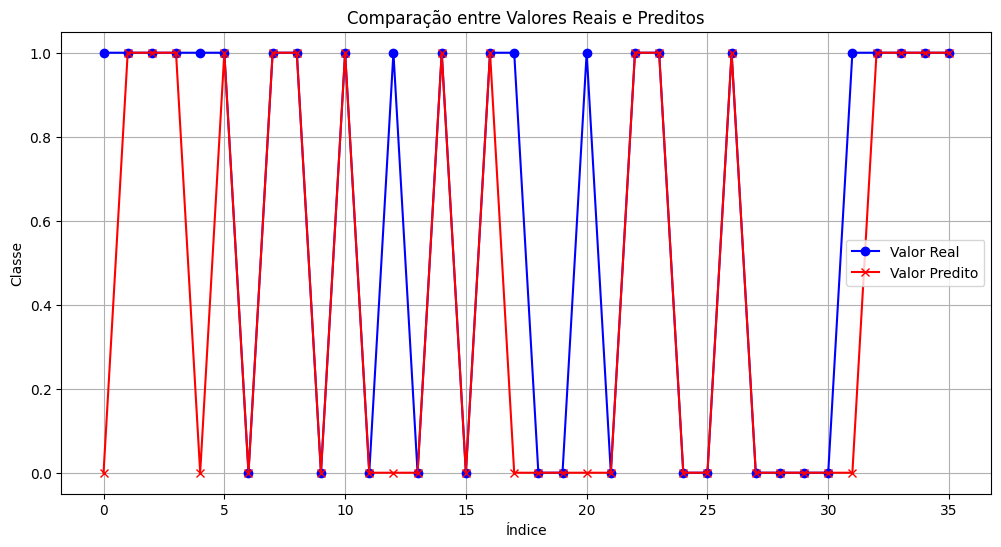

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, 'b', label='Valor Real', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, 'r', label='Valor Predito', marker='x')
plt.xlabel('Índice')
plt.ylabel('Classe')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid(True)
plt.show()